You are provided a synthetic dataset with two classes 0,1 and N=500 samples divided in 400 training and 100 testing samples.
Report all performance metrics by training on the training samples and evaluating on the testing samples.

The final deliverable is
- the notebook containing all the code used for your experimentation.
  Try to keep the code simple and organized (define and use functions when relevant).
- A short report of 2 pages separate from the notebook where you copy the most relevant results and discussion, without the code.

For Part 1, we will use only features 0 and 1

Since the dataset is 2D, try to illustrate any insight with a plot of the decision function when relevant.
1. Perform an EDA of the dataset
  a. Comment on the properties of each feature (distribution, scale...) and their suitability for classification when considered individually
  b. Comment on the suitability of pairs of features for classification
2. Explain how you preprocess the data, and why
3. Evaluate linear models (logistic regression and linear SVM) using Precision, Recall and F1-score.
   For now, evaluate each model individually: which parameters do you need to tune, how does the performance vary based on these parameters?
4. Evaluate non-linear models (kernel SVM, Random Forest, KNN) using Precision, Recall and F1-score.
   For now, evaluate each model individually: which parameters do you need to tune, how does the performance vary based on these parameters?
5. Perform a comparative analysis of the performance of all models:
   a. prepare a comparative table of the quantitative performances of the best model for each approach  
   b. make a qualitative analysis to explain why some models perform better/worse.

For Part 2, do the same analysis, but this time use all features.

No need to repeat what you said in Part 1, try to focus on what is new when using all the features.
In question 5, include also a discussion on how using all the features improves/worsen the performance compared to using only features 0 and 1.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [3]:
df

,target,feature_0,feature_1,feature_2,feature_3,feature_4
0,0.0,0.646854,-0.021333,97.780991,1.528105,-1.528105
1,0.0,0.736562,0.016497,60.301922,-1.199686,1.199686
2,0.0,0.550328,-0.044444,46.769166,-0.042524,0.042524
3,0.0,0.542136,-0.024445,44.865179,2.481786,-2.481786
4,0.0,0.499247,-0.008653,47.333675,1.735116,-1.735116
...,...,...,...,...,...,...
445,1.0,0.731542,-0.038014,71.590614,1.654678,-1.654678
446,1.0,0.827521,-0.055693,65.649005,3.372247,-3.372247
447,1.0,0.805741,-0.005621,95.142026,-0.893836,0.893836
448,1.0,0.565511,-0.071419,18.769565,-0.347887,0.347887


/home/luis/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/luis/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/luis/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/luis/anaconda3/envs/ml/lib/python3.12/site-packages/seabo

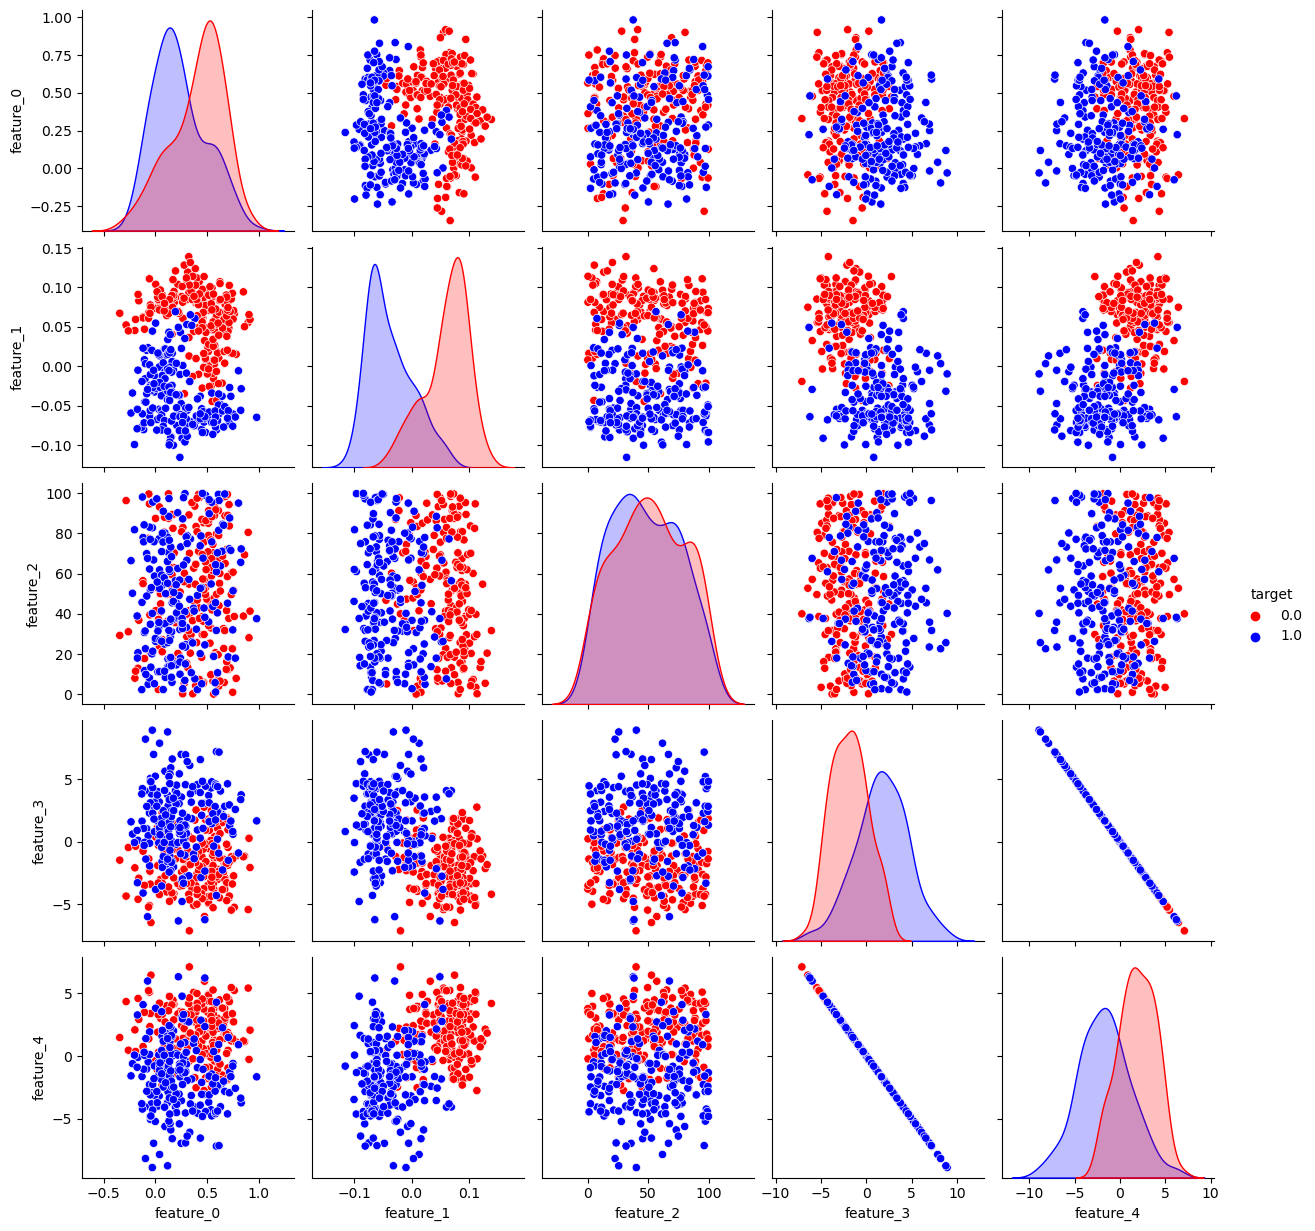

In [5]:
sns.pairplot(df, hue='target', palette=['red','blue'], vars=df.columns[1:6])

# Using all features

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:6]  # Assuming the first 5 columns are your features
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normolizing the data
Used StandardScaler to normalize the data. It is important to normalize the data because the features are not in the same scale. This can cause the model to be biased towards the features with higher scale.

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression
lr = LogisticRegression(C=6.0)  # Start with C=1.0, then tune
lr.fit(X_train, y_train)

# SVM (Linear)
svm = SVC(kernel='linear', C=5.0)
svm.fit(X_train, y_train)

# Non-linear SVM
svm_nl = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_nl.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = lr.predict(X_test)  # Or use the predict method of your model

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nLogistic Regression")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


y_pred = svm.predict(X_test) # Or use the predict method of your model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nSVM - Linear")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")    

y_pred = svm_nl.predict(X_test)  # Or use the predict method of your model

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nSVM - Non-linear")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

y_pred = rf.predict(X_test)  # Or use the predict method of your model

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nRandom Forest")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")




Logistic Regression
Precision: 0.92
Recall: 0.97
F1-Score: 0.95

SVM - Linear
Precision: 0.92
Recall: 0.97
F1-Score: 0.95

SVM - Non-linear
Precision: 0.95
Recall: 0.97
F1-Score: 0.96

Random Forest
Precision: 0.97
Recall: 1.00
F1-Score: 0.99


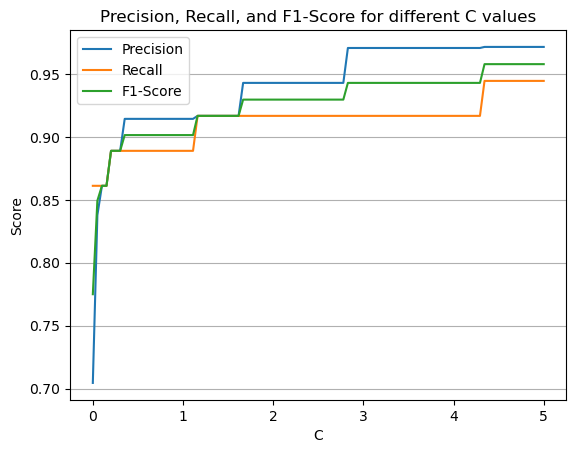

In [30]:
import numpy as np 
# Graph the precision, recall for Logistic Regression with different C values

fig, ax = plt.subplots()
c_values = np.linspace(0.0001, 5, 100)
precisions = []
recalls = []
f1s = []
for c in c_values:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    precisions.append(precision_score(y_test, y_pred_lr))
    recalls.append(recall_score(y_test, y_pred_lr))
    f1s.append(f1_score(y_test, y_pred_lr))

ax.plot(c_values, precisions, label='Precision')
ax.plot(c_values, recalls, label='Recall')
ax.plot(c_values, f1s, label='F1-Score')
# ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for different C values')
ax.yaxis.grid(True)
ax.legend()
plt.show()